In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

print(f"TensorFlow версія: {tf.__version__}")
print(f"GPU доступний: {len(tf.config.list_physical_devices('GPU')) > 0}")

TensorFlow версія: 2.19.0
GPU доступний: False


In [ ]:

df = pd.read_csv('bottle.csv', low_memory=False)

print(f"Розмір датасету: {df.shape}")
print(f"\nПерші 5 рядків:")
df.head()

Розмір датасету: (128144, 74)

Перші 5 рядків:


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0.0,10.50,33.440,NaN,25.649,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8.0,10.46,33.440,NaN,25.656,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.0,10.46,33.437,NaN,25.654,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19.0,10.45,33.420,NaN,25.643,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20.0,10.45,33.421,NaN,25.643,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Доступні стовпці в датасеті:")
print(df.columns.tolist())
print(f"\nВсього стовпців: {len(df.columns)}")

Доступні стовпці в датасеті:
['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']

Всього стовпців: 74


In [ ]:
print("Інформація про стовпці:")
df.info()

print(f"\n{'='*60}")
print(f"Всього записів: {len(df)}")
print(f"Всього стовпців: {len(df.columns)}")
print(f"{'='*60}")

Інформація про стовпці:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128144 entries, 0 to 128143
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              128144 non-null  int64  
 1   Btl_Cnt              128144 non-null  int64  
 2   Sta_ID               128144 non-null  object 
 3   Depth_ID             128144 non-null  object 
 4   Depthm               128143 non-null  float64
 5   T_degC               123602 non-null  float64
 6   Salnty               96171 non-null   float64
 7   O2ml_L               108942 non-null  float64
 8   STheta               93719 non-null   float64
 9   O2Sat                82924 non-null   float64
 10  Oxy_µmol/Kg          82924 non-null   float64
 11  BtlNum               0 non-null       float64
 12  RecInd               128143 non-null  float64
 13  T_prec               123602 non-null  float64
 14  T_qual               4747 non-null    float6

In [5]:
# Статистика
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,128144.000000,128144.000000,128143.000000,123602.000000,96171.000000,108942.000000,93719.000000,82924.000000,82924.000000,0.0,...,0.0,128143.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2167.357988,64072.500000,344.921314,9.286486,33.884930,2.818497,26.092402,46.731657,123.951686,NaN,...,NaN,347.612784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1306.766388,36992.130785,384.919859,4.423657,0.518797,2.140754,1.073043,37.518561,93.606104,NaN,...,NaN,388.740307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,1.540000,30.250000,0.030000,21.713000,0.400000,1.304340,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1039.000000,32036.750000,62.000000,5.610000,33.495000,0.630000,25.167000,9.000000,27.834418,NaN,...,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2124.000000,64072.500000,200.000000,8.580000,33.987000,2.420000,26.393000,36.900000,106.173350,NaN,...,NaN,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3215.000000,96108.250000,517.000000,12.210000,34.340000,5.120000,27.007000,88.500000,224.964800,NaN,...,NaN,520.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4629.000000,128144.000000,3762.000000,28.540000,35.280000,8.710000,28.083000,143.400000,380.014900,NaN,...,NaN,3818.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Перевірка пропущених значень
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Values': missing_data, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing_Values'] > 0].sort_values('Percent', ascending=False)
print("Пропущені значення (топ-15):")
print(missing_df.head(15))

Пропущені значення (топ-15):
         Missing_Values  Percent
NH3uM            128144    100.0
NO3uM            128144    100.0
C14As2           128144    100.0
Phaeop           128144    100.0
ChlorA           128144    100.0
BtlNum           128144    100.0
R_SIO3           128144    100.0
R_NO3            128144    100.0
R_NO2            128144    100.0
R_NH4            128144    100.0
R_PHAEO          128144    100.0
R_CHLA           128144    100.0
NO2uM            128144    100.0
DarkAs           128144    100.0
C14As1           128144    100.0


In [ ]:
base_features = ['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']

if 'Lat_Dec' in df.columns and 'Lon_Dec' in df.columns:
    base_features.extend(['Lat_Dec', 'Lon_Dec'])

available_features = [f for f in base_features if f in df.columns]
print(f"Використовуємо такі ознаки: {available_features}")

df_filtered = df[available_features].copy()

print(f"\nРозмір до очищення: {df_filtered.shape}")
df_filtered = df_filtered.dropna(subset=['T_degC', 'Salnty', 'Depthm'])

print(f"Розмір після очищення: {df_filtered.shape}")
print(f"\nПропущені значення після очищення:\n{df_filtered.isnull().sum()}")

Використовуємо такі ознаки: ['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']

Розмір до очищення: (128144, 6)
Розмір після очищення: (93719, 6)

Пропущені значення після очищення:
Depthm        0
T_degC        0
Salnty        0
O2ml_L    10795
STheta        0
O2Sat     10795
dtype: int64


In [ ]:
for col in df_filtered.columns:
    if df_filtered[col].isnull().sum() > 0:
        median_val = df_filtered[col].median()
        df_filtered[col].fillna(median_val, inplace=True)
        print(f"Заповнено {col} медіаною: {median_val:.2f}")

print(f"\nПропущені значення після заповнення: {df_filtered.isnull().sum().sum()}")

Заповнено O2ml_L медіаною: 2.44
Заповнено O2Sat медіаною: 36.90

Пропущені значення після заповнення: 0


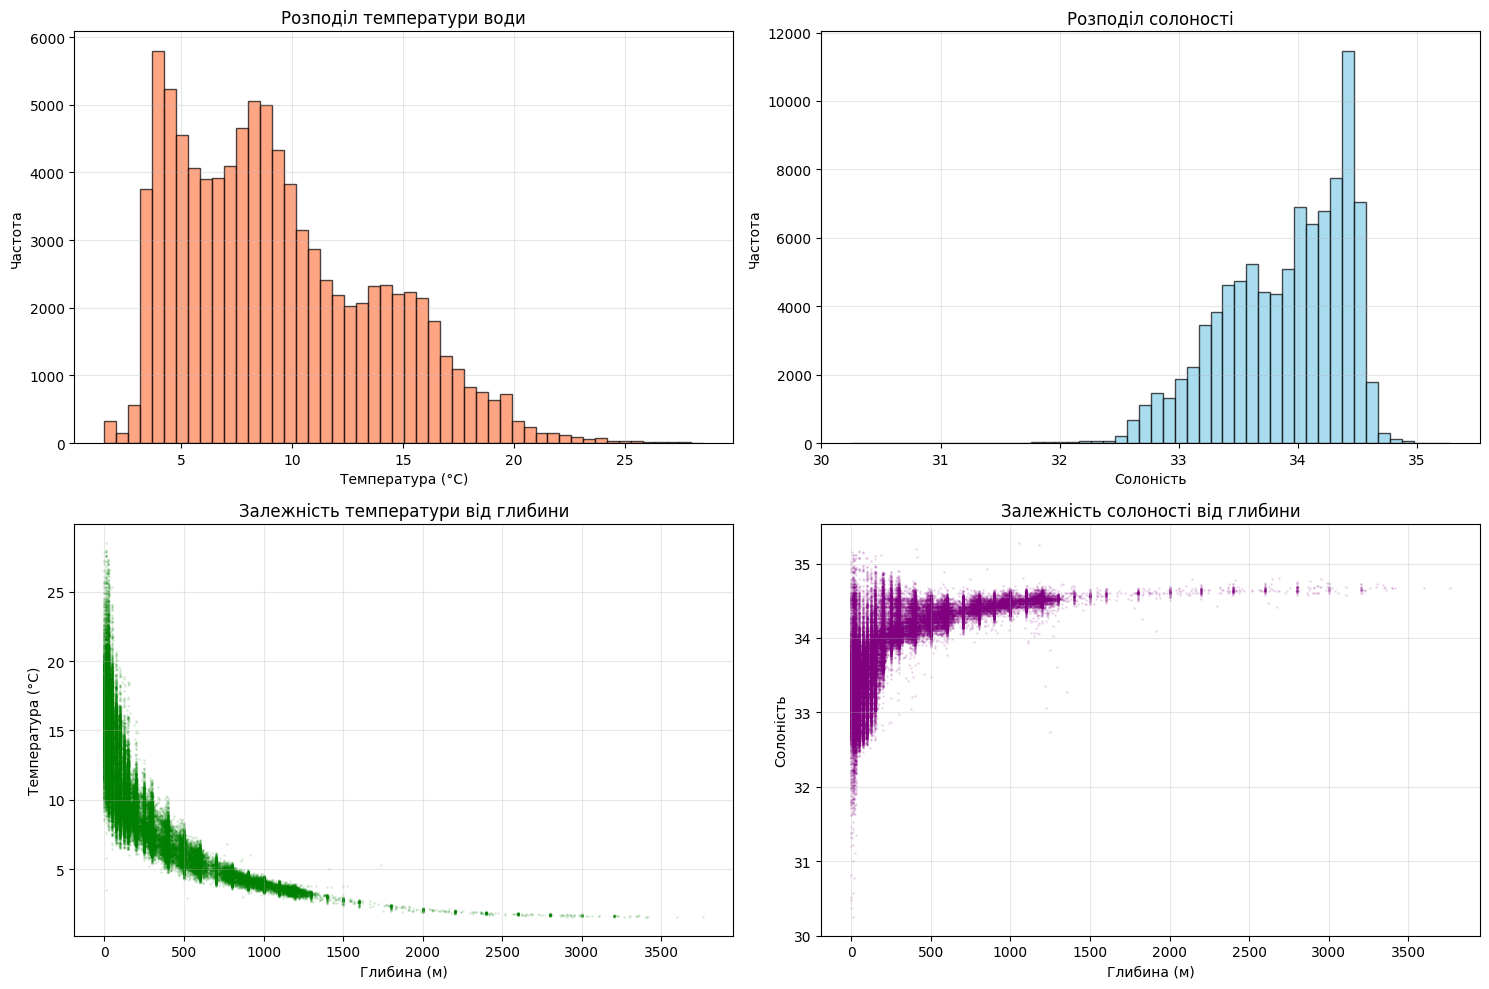

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df_filtered['T_degC'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].set_xlabel('Температура (°C)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Розподіл температури води')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df_filtered['Salnty'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].set_xlabel('Солоність')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Розподіл солоності')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].scatter(df_filtered['Depthm'], df_filtered['T_degC'], alpha=0.1, s=1, color='green')
axes[1, 0].set_xlabel('Глибина (м)')
axes[1, 0].set_ylabel('Температура (°C)')
axes[1, 0].set_title('Залежність температури від глибини')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(df_filtered['Depthm'], df_filtered['Salnty'], alpha=0.1, s=1, color='purple')
axes[1, 1].set_xlabel('Глибина (м)')
axes[1, 1].set_ylabel('Солоність')
axes[1, 1].set_title('Залежність солоності від глибини')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

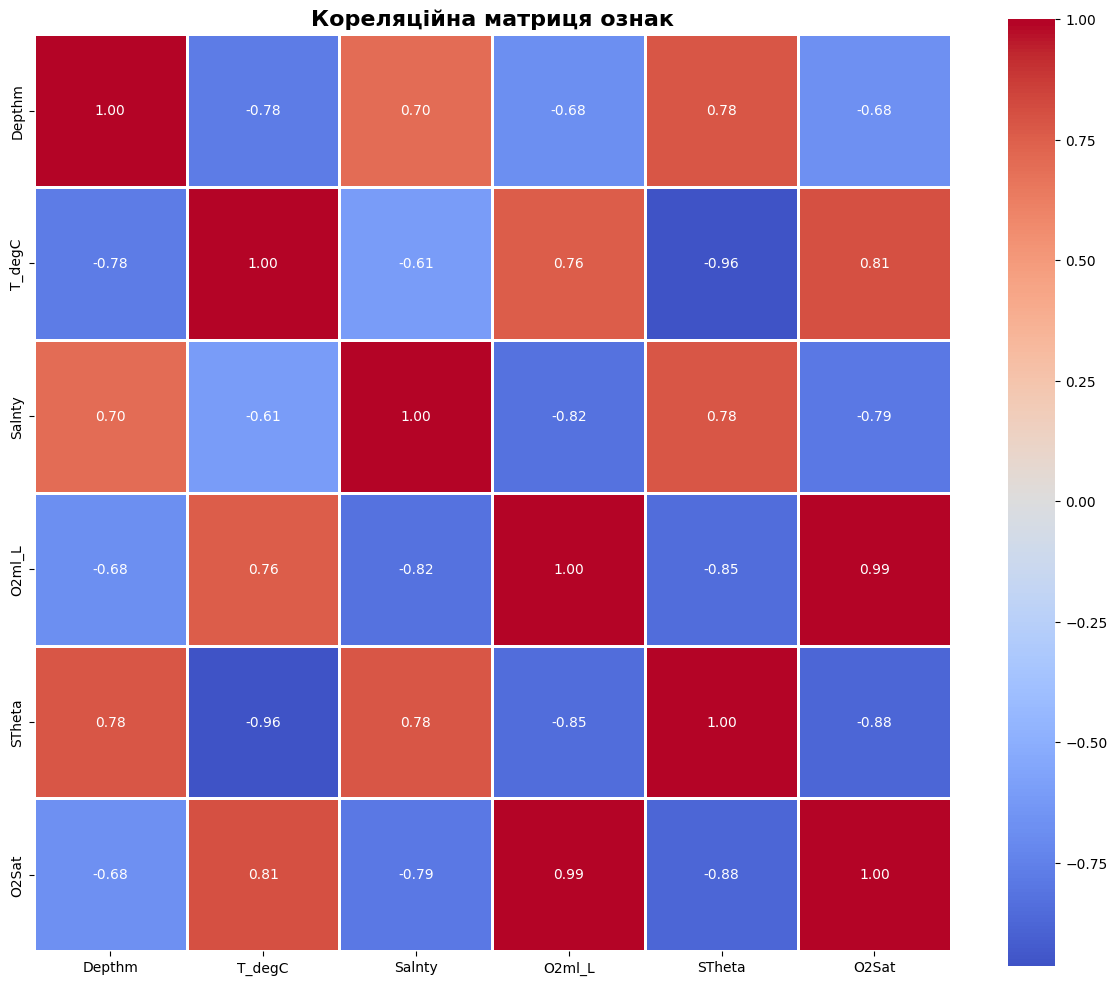

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Кореляційна матриця ознак', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## РЕГРЕСІЯ: Прогнозування температури води

In [ ]:
X_reg = df_filtered.drop('T_degC', axis=1)
y_reg = df_filtered['T_degC']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Тренувальна вибірка: {X_train_reg.shape}")
print(f"Тестова вибірка: {X_test_reg.shape}")
print(f"\nОзнаки для регресії: {list(X_reg.columns)}")

Тренувальна вибірка: (74975, 5)
Тестова вибірка: (18744, 5)

Ознаки для регресії: ['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']


In [ ]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("Дані нормалізовані")
print(f"Середнє після нормалізації: {X_train_reg_scaled.mean():.6f}")
print(f"Стандартне відхилення після нормалізації: {X_train_reg_scaled.std():.6f}")

Дані нормалізовані
Середнє після нормалізації: 0.000000
Стандартне відхилення після нормалізації: 1.000000


In [ ]:
def create_regression_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1)
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

model_reg = create_regression_model(X_train_reg_scaled.shape[1])
model_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1
)

print("Початок навчання моделі регресії...\n")
history_reg = model_reg.fit(
    X_train_reg_scaled, y_train_reg,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Початок навчання моделі регресії...

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 83.0940 - mae: 8.8304 - mse: 83.0940 - val_loss: 41.0661 - val_mae: 6.0011 - val_mse: 41.0661 - learning_rate: 0.0010
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 21.0556 - mae: 4.1320 - mse: 21.0556 - val_loss: 1.2487 - val_mae: 0.9048 - val_mse: 1.2487 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2439 - mae: 1.3534 - mse: 3.2439 - val_loss: 0.1554 - val_mae: 0.3127 - val_mse: 0.1554 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.4013 - mae: 1.1549 - mse: 2.4013 - val_loss: 0.0844 - val_mae: 0.2327 - val_mse: 0.0844 - learning_rate: 0.0010
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.9733 - mae: 1.0457 - mse: 1.9733 - val_loss: 0.0409 - val_mae: 0.1533 - val_mse: 0.0409 - learning_rate: 0.0010
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7891 - mae: 0.9884

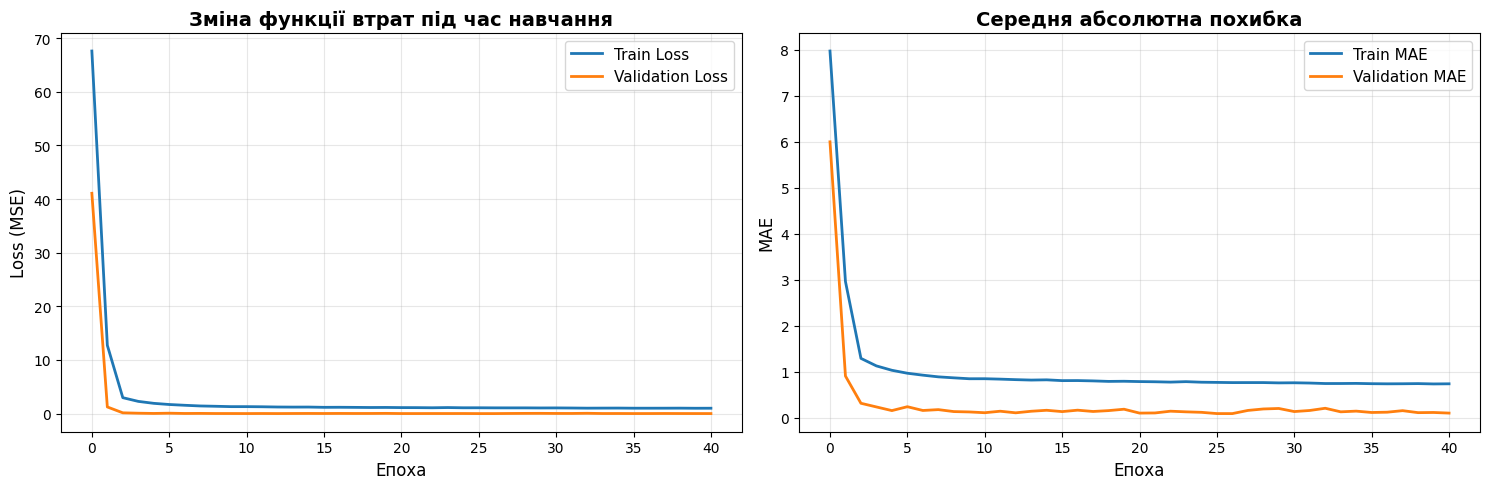

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history_reg.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('Зміна функції втрат під час навчання', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_reg.history['mae'], label='Train MAE', linewidth=2)
plt.plot(history_reg.history['val_mae'], label='Validation MAE', linewidth=2)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Середня абсолютна похибка', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_reg = model_reg.predict(X_test_reg_scaled, verbose=0).flatten()

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)
mae = np.mean(np.abs(y_test_reg - y_pred_reg))

print("=" * 50)
print("РЕЗУЛЬТАТИ РЕГРЕСІЇ (Прогнозування температури)")
print("=" * 50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}°C")
print(f"Mean Absolute Error (MAE): {mae:.4f}°C")
print(f"R² Score: {r2:.4f}")
print("=" * 50)

РЕЗУЛЬТАТИ РЕГРЕСІЇ (Прогнозування температури)
Mean Squared Error (MSE): 0.0124
Root Mean Squared Error (RMSE): 0.1115°C
Mean Absolute Error (MAE): 0.0892°C
R² Score: 0.9994


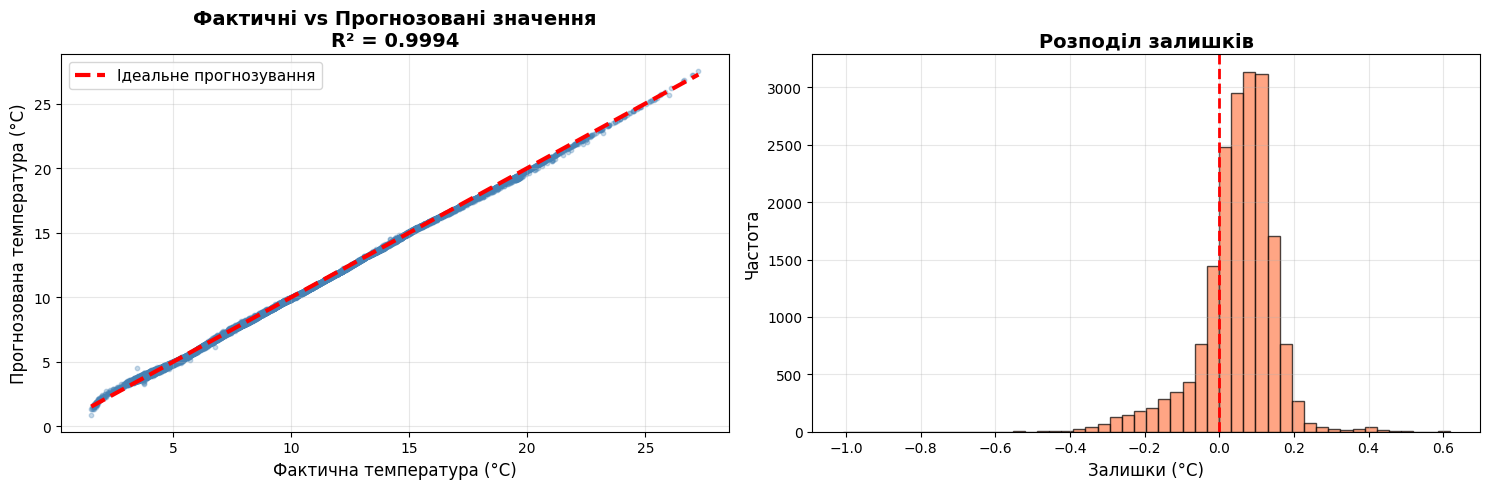

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3, s=10, color='steelblue')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=3, label='Ідеальне прогнозування')
plt.xlabel('Фактична температура (°C)', fontsize=12)
plt.ylabel('Прогнозована температура (°C)', fontsize=12)
plt.title(f'Фактичні vs Прогнозовані значення\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test_reg - y_pred_reg
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Залишки (°C)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Розподіл залишків', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## КЛАСИФІКАЦІЯ: Визначення рівня солоності

In [ ]:
median_salinity = df_filtered['Salnty'].median()
print(f"Медіанна солоність: {median_salinity:.2f}")

df_filtered['Salinity_Class'] = (df_filtered['Salnty'] > median_salinity).astype(int)

print("\nРозподіл класів:")
print(df_filtered['Salinity_Class'].value_counts())
print(f"\nВідсоток класу 0 (низька солоність): {(df_filtered['Salinity_Class'] == 0).sum() / len(df_filtered) * 100:.2f}%")
print(f"Відсоток класу 1 (висока солоність): {(df_filtered['Salinity_Class'] == 1).sum() / len(df_filtered) * 100:.2f}%")

Медіанна солоність: 34.00

Розподіл класів:
Salinity_Class
0    47021
1    46698
Name: count, dtype: int64

Відсоток класу 0 (низька солоність): 50.17%
Відсоток класу 1 (висока солоність): 49.83%


In [ ]:
X_clf = df_filtered.drop(['Salnty', 'Salinity_Class'], axis=1)
y_clf = df_filtered['Salinity_Class']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Тренувальна вибірка: {X_train_clf.shape}")
print(f"Тестова вибірка: {X_test_clf.shape}")
print(f"\nРозподіл класів у тренувальній вибірці:")
print(y_train_clf.value_counts())
print(f"\nОзнаки для класифікації: {list(X_clf.columns)}")

Тренувальна вибірка: (74975, 5)
Тестова вибірка: (18744, 5)

Розподіл класів у тренувальній вибірці:
Salinity_Class
0    37617
1    37358
Name: count, dtype: int64

Ознаки для класифікації: ['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat']


In [ ]:
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("Дані для класифікації нормалізовані")

Дані для класифікації нормалізовані


In [ ]:
def create_classification_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

model_clf = create_classification_model(X_train_clf_scaled.shape[1])
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stopping_clf = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_clf = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1
)

print("Початок навчання моделі класифікації...\n")
history_clf = model_clf.fit(
    X_train_clf_scaled, y_train_clf,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping_clf, reduce_lr_clf],
    verbose=1
)

Початок навчання моделі класифікації...

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9044 - auc: 0.9603 - loss: 0.2261 - val_accuracy: 0.9369 - val_auc: 0.9955 - val_loss: 0.1623 - learning_rate: 0.0010
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - auc: 0.9972 - loss: 0.0686 - val_accuracy: 0.9732 - val_auc: 0.9990 - val_loss: 0.0613 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9783 - auc: 0.9984 - loss: 0.0523 - val_accuracy: 0.9738 - val_auc: 0.9995 - val_loss: 0.0611 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9781 - auc: 0.9983 - loss: 0.0529 - val_accuracy: 0.9918 - val_auc: 0.9999 - val_loss: 0.0211 - learning_rate: 0.0010
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - auc: 0.9986 - loss: 0.0472 - val_accuracy: 0.9927 - val_auc: 0.9999 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 6/100
235/235 ━━━━━━━━━━━━━

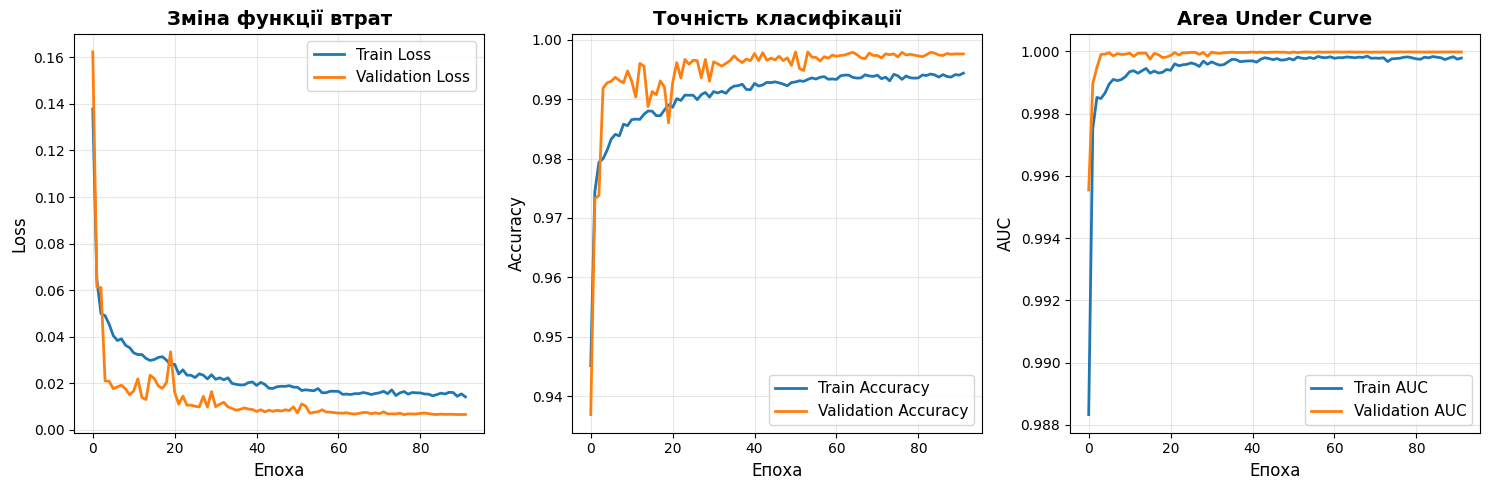

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_clf.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history_clf.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Зміна функції втрат', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history_clf.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history_clf.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Точність класифікації', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(history_clf.history['auc'], label='Train AUC', linewidth=2)
plt.plot(history_clf.history['val_auc'], label='Validation AUC', linewidth=2)
plt.xlabel('Епоха', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Area Under Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_clf_prob = model_clf.predict(X_test_clf_scaled, verbose=0).flatten()
y_pred_clf = (y_pred_clf_prob > 0.5).astype(int)

test_loss, test_accuracy, test_auc = model_clf.evaluate(X_test_clf_scaled, y_test_clf, verbose=0)

print("=" * 50)
print("РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ (Рівень солоності)")
print("=" * 50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test AUC: {test_auc:.4f}")
print("=" * 50)

РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ (Рівень солоності)
Test Loss: 0.0064
Test Accuracy: 0.9978 (99.78%)
Test AUC: 1.0000


In [ ]:
print("\nДетальний звіт класифікації:")
print(classification_report(y_test_clf, y_pred_clf,
                          target_names=['Низька солоність', 'Висока солоність']))


Детальний звіт класифікації:
                  precision    recall  f1-score   support

Низька солоність       1.00      1.00      1.00      9404
Висока солоність       1.00      1.00      1.00      9340

        accuracy                           1.00     18744
       macro avg       1.00      1.00      1.00     18744
    weighted avg       1.00      1.00      1.00     18744



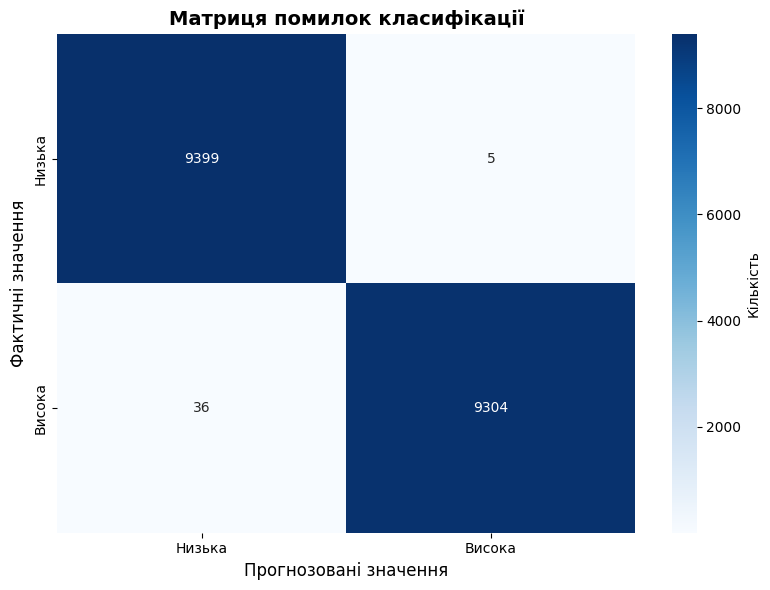


Додаткові метрики:
Sensitivity (Recall): 0.9961
Specificity: 0.9995
Precision: 0.9995
F1-Score: 0.9978


In [ ]:
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Низька', 'Висока'],
            yticklabels=['Низька', 'Висока'],
            cbar_kws={'label': 'Кількість'})
plt.ylabel('Фактичні значення', fontsize=12)
plt.xlabel('Прогнозовані значення', fontsize=12)
plt.title('Матриця помилок класифікації', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) 
specificity = tn / (tn + fp)  
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nДодаткові метрики:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")